<a href="https://colab.research.google.com/github/mauronk/Alura-QuarentenaDados/blob/master/MeuQuarentenaDados1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
xteste='mauro nakamura'
print(xteste)

mauro nakamura


Usando o **Pandas** e importando filmes (movies.csv) e avaliacoes(ratings.csv) que deixei no googledrive

Também poderia ter pego de https://github.com/alura-cursos/introducao-a-data-science

Criei o meu próprio em https://raw.githubusercontent.com/mauronk/bases/master/

In [0]:
import pandas as pd

In [13]:
#filmes =  pd.read_csv("/content/movies.csv")
filmes =  pd.read_csv("https://raw.githubusercontent.com/mauronk/bases/master/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# avaliacoes = pd.read_csv("/content/ratings.csv")
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/mauronk/bases/master/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
avaliacoes.shape

(100836, 4)

In [16]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [17]:
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Describe() dá um resumo contando, media, min, max, etc

In [18]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [19]:
avaliacoes.query("filmeId==1").describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Média das notas dos filmes

In [20]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

**JOIN** tipo do sql retirando o titulo do filme e juntando com as notas

In [21]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [22]:
filmes_com_media.columns = ["filmeId","titulo","generos","media"]
filmes_com_media.sort_values("media", ascending=False)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#gráfico de avaliações

In [23]:
avaliacoes.query("filmeId == 1").head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


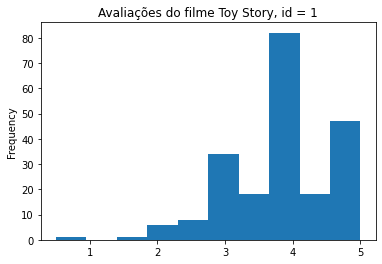

In [24]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist', title='Avaliações do filme Toy Story, id = 1')

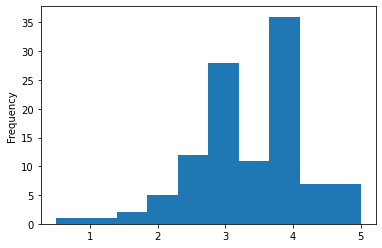

In [25]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

#Desafios

Desafio 1 do Paulo Silveira

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes

In [26]:
filmes_com_media["media"].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9737    True
9738    True
9739    True
9740    True
9741    True
Name: media, Length: 9742, dtype: bool

In [27]:
filmes_com_media["media"].notnull().value_counts()

True     9724
False      18
Name: media, dtype: int64

In [28]:
filmes_sem_avaliacao = filmes_com_media["media"].isnull()
filmes_com_media[filmes_sem_avaliacao]

,filmeId,titulo,generos,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


###Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [29]:
numero_de_avaliacoes  = avaliacoes.groupby("filmeId")["nota"].count()
filmes_qtd_nota = filmes.join(numero_de_avaliacoes, on="filmeId")
filmes_qtd_nota.columns = ["filmeId","titulo","generos","numero de notas"]
filmes_qtd_nota

,filmeId,titulo,generos,numero de notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


###Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [30]:
filmes_com_media['media'] = round(filmes_com_media['media'],2)
filmes_com_media


,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


###Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [31]:
filmes_com_media.generos.str.get_dummies().columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [32]:
filmes_com_media.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Desafio 6 da Thais André

Contar o número de aparições de cada genero.

In [33]:
filmes_com_media.generos.str.get_dummies().sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

###Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

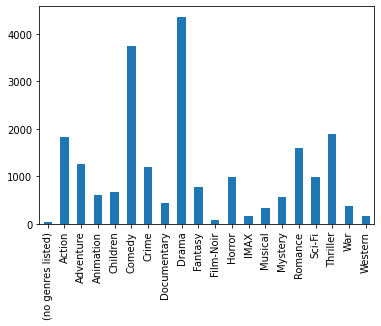

In [34]:
soma_de_generos=filmes_com_media.generos.str.get_dummies().sum()
soma_de_generos.plot.bar(x=soma_de_generos)